<a href="https://colab.research.google.com/github/healerHK/Data-Analyst---Workshop/blob/main/Detectron2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object detection with Detectron2

![](https://cdn.ps.emap.com/wp-content/uploads/sites/3/2017/12/Oxford_Street.jpg)

## 1) Install detectron2 (if running on Colab with GPU enabled)

Check torch and cuda version then install the correponding pre-built detectron2: https://detectron2.readthedocs.io/en/latest/tutorials/install.html

In [1]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version

2.6.0+cu124 True
gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [9]:
!python -m pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.10/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.10/index.html
ERROR: Could not find a version that satisfies the requirement detectron2 (from versions: none)
ERROR: No matching distribution found for detectron2


In [10]:
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

Cloning into 'detectron2_repo'...
remote: Enumerating objects: 15860, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 15860 (delta 43), reused 14 (delta 14), pack-reused 15786 (from 4)
Receiving objects: 100% (15860/15860), 6.42 MiB | 24.54 MiB/s, done.
Resolving deltas: 100% (11542/11542), done.
Obtaining file:///content/detectron2_repo
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 65.0 MB/s eta 0

## 2) Install detectron2 in local (if not using Colab)

Install Detectron2 in Windows, Linux with Anaconda and GPU-enabled:

https://medium.com/@yogeshkumarpilli/how-to-install-detectron2-on-windows-10-or-11-2021-aug-with-the-latest-build-v0-5-c7333909676f

https://medium.com/@sujoydebnath.92/installing-detectron2-with-anaconda-and-cuda-on-linux-7b710663326c

https://anaconda.org/conda-forge/detectron2


Installing Detectron2 natively for Mac M1 Pro / Apple silicon (use Miniforge) (tested):

https://medium.com/@hakon.hukkelas/installing-detectron2-natively-for-mac-m1-pro-apple-silicon-a89517f1c913

## 3) Inference with pre-trained model

#### Import packages

In [1]:
# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
import matplotlib.pyplot as plt
import cv2

We first need to download a image to make predictions on.

In [2]:
# !wget https://cdn.ps.emap.com/wp-content/uploads/sites/3/2017/12/Oxford_Street.jpg -O oxford_street.jpg
import requests

image_url = "https://cdn.ps.emap.com/wp-content/uploads/sites/3/2017/12/Oxford_Street.jpg"
img_data = requests.get(image_url).content
with open('oxford_street.jpg', 'wb') as handler:
    handler.write(img_data)

import os
os.stat('oxford_street.jpg')

os.stat_result(st_mode=33188, st_ino=795470, st_dev=64, st_nlink=1, st_uid=0, st_gid=0, st_size=179209, st_atime=1746952821, st_mtime=1746953075, st_ctime=1746953075)

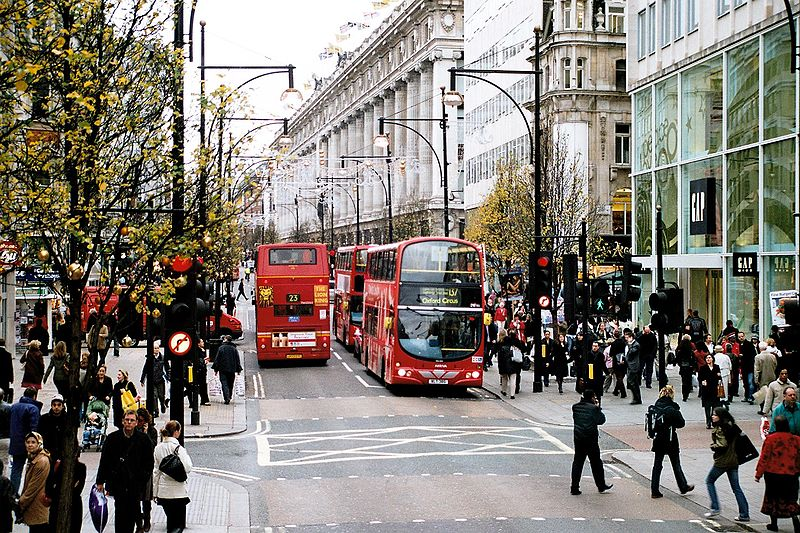

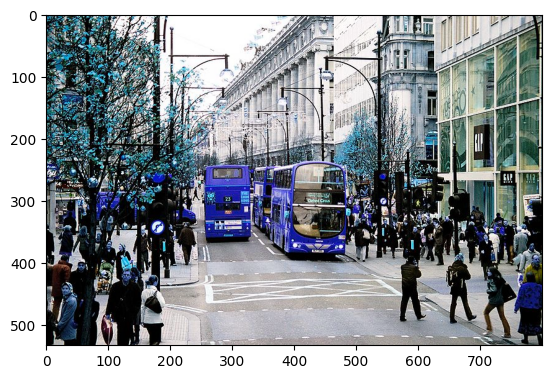

In [3]:
%matplotlib inline
im = cv2.imread("./oxford_street.jpg")
plt.imshow(im)

from IPython.display import Image
Image(filename='oxford_street.jpg')

#### Import the model and the config

Your turn to work now !

- for example, you can choose Faster_rcnn pretrained (its signature is `"COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"` in the detectron model zoo)

In [5]:
# Create config
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file('COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml'))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url('COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml')
# cfg.MODEL.DEVICE = 'cuda'

In [7]:
# Generate model and Create predictor
predictor = DefaultPredictor(cfg)

model_final_280758.pkl: 167MB [00:00, 211MB/s]                           


In [11]:
# Make prediction
import numpy as np
# Convert the image data to a NumPy array
image_np = np.frombuffer(img_data, np.uint8)
# Decode the image using OpenCV
image = cv2.imdecode(image_np, cv2.IMREAD_COLOR)
# Now you can use the decoded image with the predictor
outputs = predictor(image)

/usr/local/lib/python3.11/dist-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


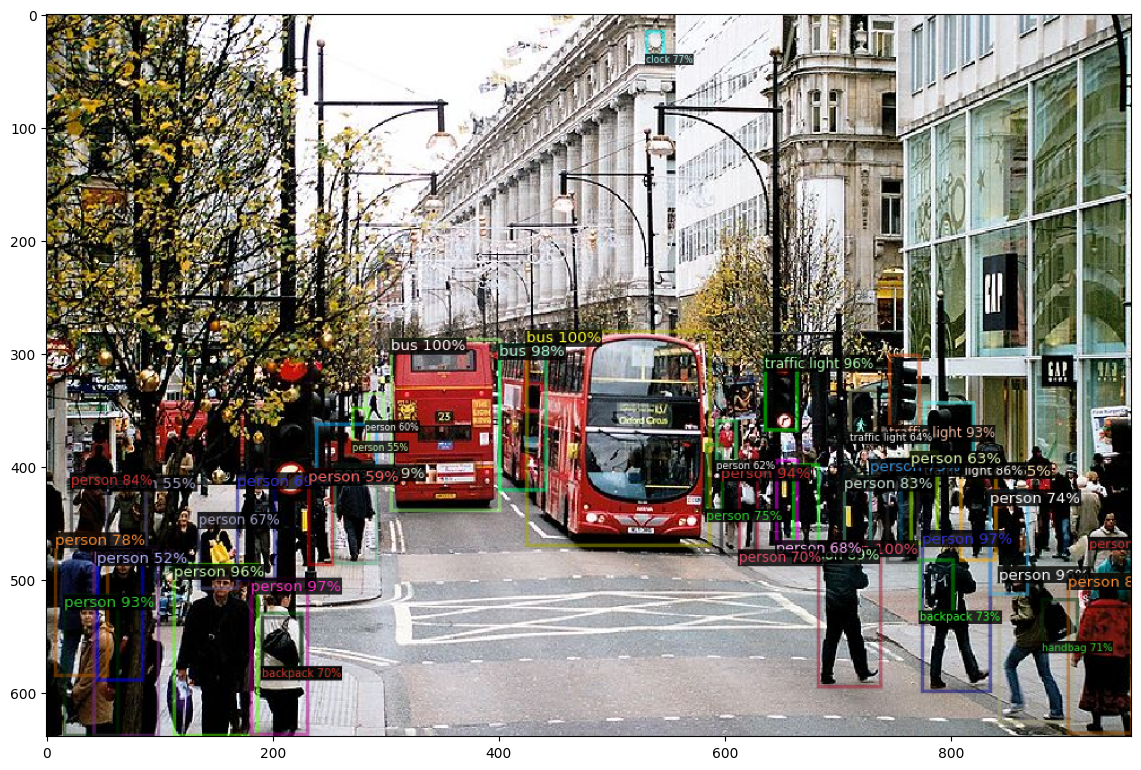

In [12]:
# Visualize the bounding boxes on the image
v = Visualizer(image[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize = (14, 10))
plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))

**\[BONUS\]** Feel free to :
- Test the faster-RNN we just used on other images of your choosing
- Test some of the other algorithms available in the [model zoo](https://github.com/facebookresearch/detectron2/blob/master/MODEL_ZOO.md) and see how they perform

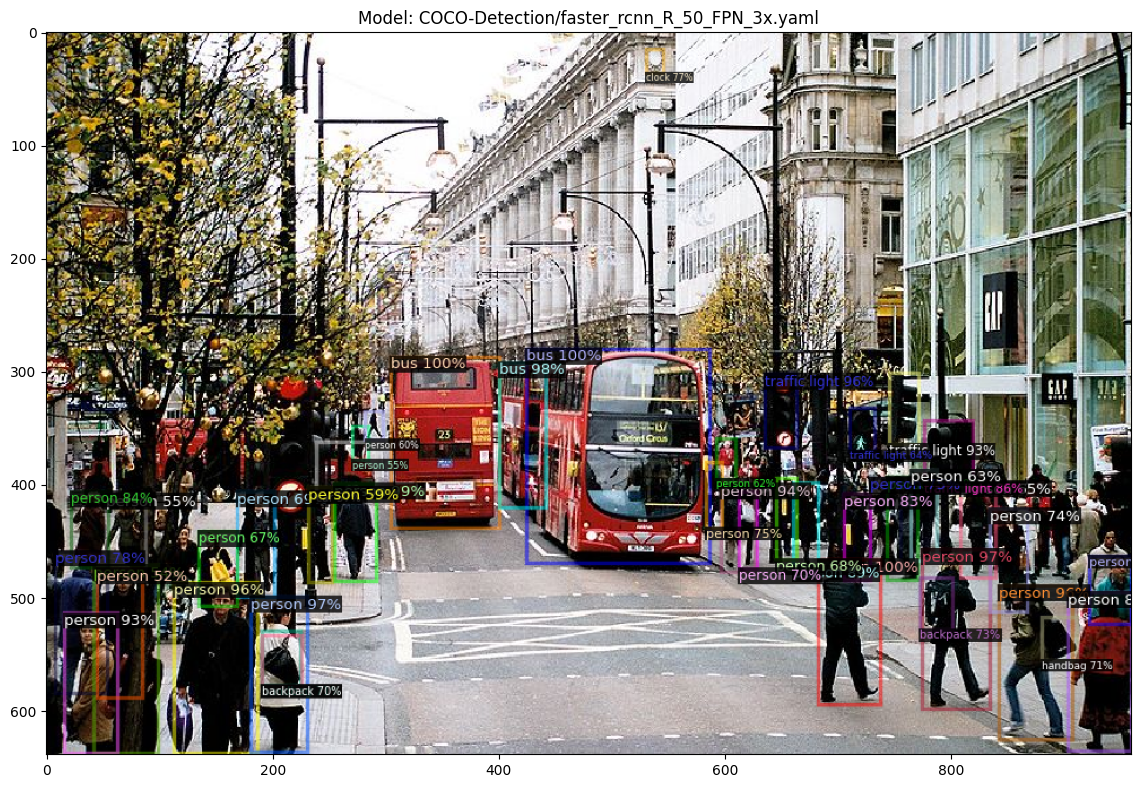

model_final_5bd44e.pkl: 152MB [00:01, 86.9MB/s]                           
  pixel_mean
  pixel_std


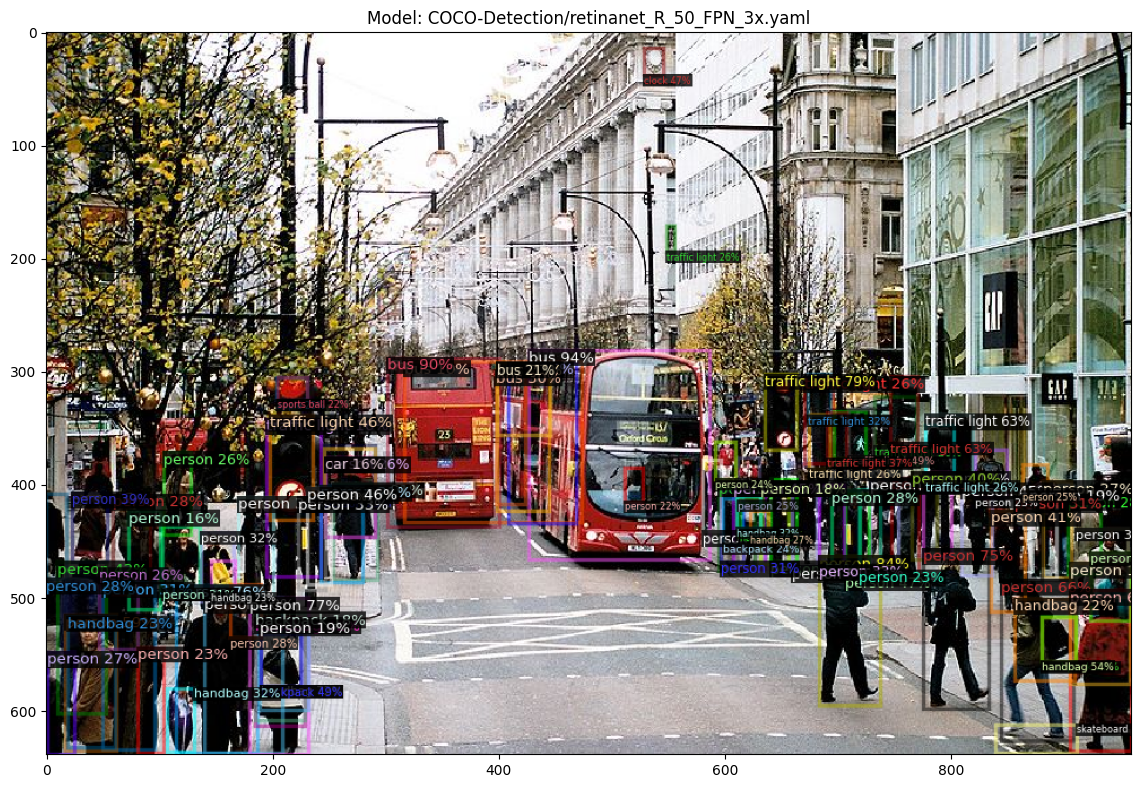

model_final_f10217.pkl: 178MB [00:01, 159MB/s]                           


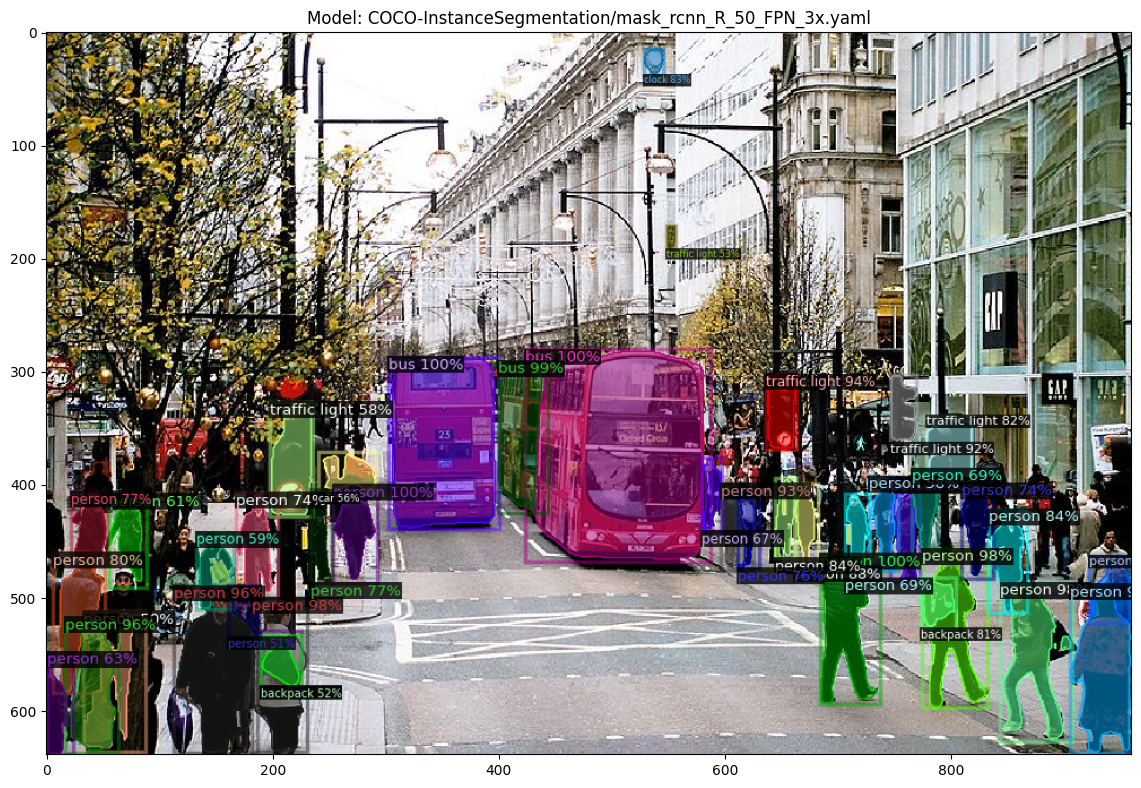

In [13]:
models = [
    "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml",
    "COCO-Detection/retinanet_R_50_FPN_3x.yaml",
    "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
]

for model_yaml in models:
    cfg = get_cfg()
    cfg.merge_from_file(model_zoo.get_config_file(model_yaml))
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
    cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(model_yaml)

    # Generate model and Create predictor
    predictor = DefaultPredictor(cfg)

    # Make prediction
    outputs = predictor(image)

    # Visualize the bounding boxes on the image
    v = Visualizer(image[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.figure(figsize=(14, 10))
    plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.title(f"Model: {model_yaml}")
    plt.show()